In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import mlrose_hiive as mlrose
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
%config Completer.use_jedi = False
from sklearn.metrics import classification_report


Bad key "“backend" on line 1 in
/Users/bhkash/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def plotIterationGraph(df):
    
    df = df[['Score']]
    df.plot()
    plt.title("Training Score vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy") 
    
    plt.grid()
    plt.show()
    

In [24]:
def plotIterationGraph_bp(df, curve, title = "Backpropogation Accuracy and Loss Curve"):
    
    fig, axs = plt.subplots(2)
    fig.suptitle(title,fontsize = 15, fontweight = 'heavy')
    axs[0].plot(df['Score'])
    axs[0].set(ylabel="Accuracy")
    axs[0].grid()
    plt.xlabel("Iterations")
    axs[1].plot(curve*-1, color ="red") 
    axs[1].set(ylabel="Loss")
    axs[1].grid()
    


In [36]:
def plotIterationGraph(df, curve, title = "Accuracy"):
    
    fig, axs = plt.subplots(2)
    fig.suptitle(title,fontsize = 15, fontweight = 'heavy')
    axs[0].plot(df['Score'])
    axs[0].set(ylabel="Accuracy")
    axs[0].grid()
    plt.xlabel("Iterations")
    axs[1].plot(curve, color ="red") 
    axs[1].set(ylabel="Loss")
    axs[1].grid()
    

# Reading Data

In [5]:
data = pd.read_csv("BreastCancer.csv", index_col="id")
data["label"] = 0
#label
data.label[data.diagnosis == 'B'] = 0
data.label[data.diagnosis == 'M'] = 1
data = data.drop(columns=['Unnamed: 32', 'diagnosis'])
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
#Split
X = data.iloc[:,:-1]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = data['label'], random_state = 1)
#Scale
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
print(np.min(X_train_scaled))
print(np.max(X_test_scaled))

-3.128769578277597
11.581832982981581


# Common Functions

In [8]:
def F1Score(model, X_test, y_test):
    prediction=model.predict(X_test)
    print('The balanced accuracy of the Model is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
    print(classification_report(prediction,y_test))


# Back Prop

In [9]:
def run_nn_backprop(X_train, y_train, epochs):
    
    results = []

    for epoch in epochs:
        
        if str(type(epoch)) == str(np.int64):
            epoch = int(epoch)
    
        
        neural_net = mlrose.NeuralNetwork(
                hidden_nodes=[5,5],
                activation='tanh',
                algorithm='gradient_descent',
                max_iters=epoch,
                bias=True,
                is_classifier=True,
                learning_rate=0.001,
                early_stopping=True,
                clip_max=1,
                max_attempts=100,
                random_state=1,
                curve = True
        )
        
        start = time.time()
        neural_net.fit(X_train, y_train)
        end = time.time()
        
        timing = end - start
        score = neural_net.score(X_train, y_train)
        
        result = [epoch, score, timing, neural_net.loss]
        results.append(result)
    df = pd.DataFrame(results, columns = ["Epochs", 'Score', "TrainTime", "Loss"])
    df = df.set_index("Epochs")
    return df, neural_net

In [11]:
epochs = 2 ** np.arange(9)
epochs = list(epochs)
epochs.append(275)
epochs.append(400)
df_backProp, model_bp = run_nn_backprop(X_train_scaled, y_train, epochs=epochs)

In [12]:
df_backProp

,Score,TrainTime,Loss
Epochs,,,
1,0.828571,0.007580,0.531492
2,0.872527,0.004524,0.475427
4,0.901099,0.007409,0.383026
8,0.912088,0.013899,0.274895
16,0.938462,0.027049,0.186588
32,0.960440,0.049685,0.133219
64,0.978022,0.075398,0.085533
128,0.986813,0.147422,0.062120
256,0.986813,0.288241,0.052280


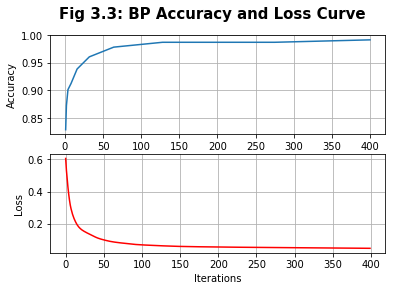

In [31]:
plotIterationGraph_bp(df_backProp, model_bp.fitness_curve, "Fig 3.3: BP Accuracy and Loss Curve")

In [190]:
F1Score(model_bp, X_train_scaled, y_train)

The balanced accuracy of the Model is 0.988
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       289
           1       0.98      1.00      0.99       166

   micro avg       0.99      0.99      0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [191]:
F1Score(model_bp, X_test_scaled, y_test)

The balanced accuracy of the Model is 0.965
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [137]:
plotIterationGraph(df_backProp)

AttributeError: 'DataFrame' object has no attribute 'subplot'

# RHC

In [32]:
def run_nn_RHC(X_train, y_train, epochs, returnCurve = False):
    
    results = []

    for epoch in epochs:
        
        if str(type(epoch)) == str(np.int64):
            epoch = int(epoch)
    
        
        neural_net = mlrose.NeuralNetwork(
                hidden_nodes=[5,5],
                activation='tanh',
                algorithm='random_hill_climb',
                max_iters=epoch,
                bias=True,
                is_classifier=True,
                learning_rate=0.001,
                early_stopping=True,
                clip_max=1,
                max_attempts=1000,
                random_state=1,
                curve = True,
                restarts = 5

        )
        
        start = time.time()
        neural_net.fit(X_train, y_train)
        print(neural_net.loss)
        end = time.time()
        
        timing = end - start
        score = neural_net.score(X_train, y_train)
        
        result = [epoch, score, timing]
        results.append(result)
    df = pd.DataFrame(results, columns = ["Epochs", 'Score', "TrainTime"])
    df = df.set_index("Epochs")
    
    if returnCurve:
        return df, neural_net
    
    return df

In [219]:
def run_nn_RHC(X_train, y_train, epochs):
    
    results = []

    for epoch in epochs:
        
        if str(type(epoch)) == str(np.int64):
            epoch = int(epoch)
    
        
        neural_net = mlrose.NeuralNetwork(
                hidden_nodes=[5,5],
                activation='tanh',
                algorithm='random_hill_climb',
                max_iters=epoch,
                bias=True,
                is_classifier=True,
                learning_rate=0.001,
                early_stopping=True,
                clip_max=1,
                max_attempts=1000,
                random_state=1
        )
        
        start = time.time()
        neural_net.fit(X_train, y_train)
        end = time.time()
        
        timing = end - start
        score = neural_net.score(X_train, y_train)
        
        result = [epoch, score, timing]
        results.append(result)
    df = pd.DataFrame(results, columns = ["Epochs", 'Score', "TrainTime"])
    df = df.set_index("Epochs")
    return df

0.6061056019391012
0.6061056019391012
0.6061056019391012
0.6061056019391012
0.6059309803211277
0.6057132454299984
0.6055259413670872
0.6051113342310114
0.6042577697446595
0.6025663279062511
0.5986734617471609
0.5910482493623875
0.5777607749661914
0.5483961550300017
0.48961834706304286
0.38249434621102224
0.23197984874542904
0.09246295093321516
0.027019259060225984


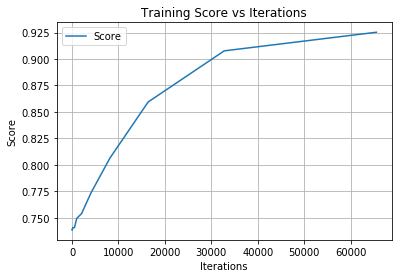

In [116]:
epochs = 2 ** np.arange(19)
epochs = list(epochs)
df_RHC_test, nn_RHC_test = run_nn_RHC(X_train_scaled, y_train, epochs=epochs)
plotIterationGraph(df_RHC)

In [88]:
epochs = 2 ** np.arange(18)
epochs = list(epochs)
df_RHC = run_nn_RHC(X_train_scaled, y_train, epochs=epochs)

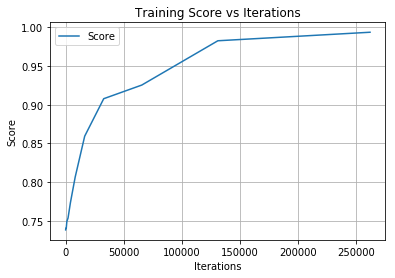

In [152]:
plotIterationGraph(df)

In [105]:

epochs = 2 ** np.arange(18)
epochs = list(epochs)
df, model_RHC = run_nn_RHC(X_train_scaled, y_train, epochs=epochs, returnCurve =True)

0.6061056019391012
0.6061056019391012
0.6061056019391012
0.6061056019391012
0.6059309803211277
0.6057132454299984
0.6055259413670872
0.6051113342310114
0.6042577697446595
0.6025663279062511
0.5986734617471609
0.5910482493623875
0.5777607749661914
0.5483961550300017
0.48961834706304286
0.38249434621102224
0.23197984874542904
0.09246295093321516


In [223]:
epochs = 2 ** np.arange(15)
epochs = list(epochs)
df_RHC_lr, model_RHC_lr = run_nn_RHC(X_train_scaled, y_train, epochs=epochs, returnCurve =True)

0.6061056019391012
0.6059881020186927
0.6059650502430973
0.6059400282410683
0.605836837659546
0.6057132454299984
0.6055259413670872
0.6051113342310114
0.6037834363427642
0.6019474061868145
0.5981240586439426
0.5910102289238681
0.5759338152197415
0.5467428617559839
0.48558782923599264


In [34]:
epochs = 2 ** np.arange(17)
epochs = list(epochs)
df_RHC, model_RHC = run_nn_RHC(X_train_scaled, y_train, epochs=epochs, returnCurve =True)


0.6061056019391012
0.6059881020186927
0.6059650502430973
0.6059400282410683
0.605836837659546
0.6057132454299984
0.6055259413670872
0.6051113342310114
0.6037834363427642
0.6019474061868145
0.5981240586439426
0.5910102289238681
0.5759338152197415
0.5467428617559839
0.48558782923599264
0.38044743816154564
0.23068812993817617


In [215]:
df_RHC

,Score,TrainTime
Epochs,,
1,0.738462,0.011645
2,0.738462,0.024830
4,0.738462,0.031137
8,0.740659,0.055452
16,0.738462,0.086765
32,0.738462,0.171520
64,0.738462,0.304615
128,0.740659,0.634494
256,0.740659,1.308215


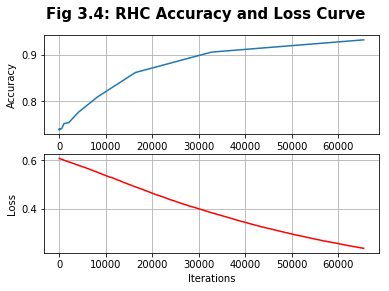

In [37]:
plotIterationGraph(df_RHC, model_RHC.fitness_curve, "Fig 3.4: RHC Accuracy and Loss Curve")

In [214]:
F1Score(model_RHC, X_train_scaled, y_train)

The balanced accuracy of the Model is 0.913
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       268
           1       0.96      0.87      0.91       187

   micro avg       0.93      0.93      0.93       455
   macro avg       0.94      0.92      0.93       455
weighted avg       0.93      0.93      0.93       455



In [281]:
F1Score(model_RHC, X_test_scaled, y_test)

The balanced accuracy of the Model is 0.953
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.98      0.93      0.95        44

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



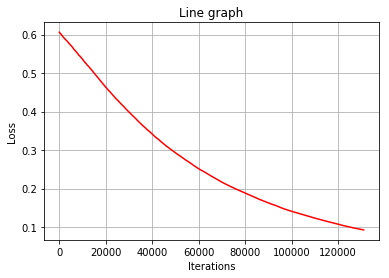

TypeError: plotIterationGraph() missing 1 required positional argument: 'curve'

In [173]:
plotCurve(model_RHC.fitness_curve)
plotIterationGraph(df)

In [111]:
df

,Score,TrainTime
Epochs,,
1,0.738462,0.003644
2,0.738462,0.003359
4,0.738462,0.005301
8,0.738462,0.008195
16,0.738462,0.020045
32,0.738462,0.035724
64,0.738462,0.063405
128,0.740659,0.107148
256,0.740659,0.207904


In [109]:
F1Score(model_bp, X_train_scaled, y_train)
F1Score(model_bp, X_test_scaled, y_test)

The balanced accuracy of the Model is 0.982
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       287
           1       0.98      0.99      0.98       168

   micro avg       0.99      0.99      0.99       455
   macro avg       0.98      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

The balanced accuracy of the Model is 0.965
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [144]:

epochs = list([100])
df, curve = run_nn_RHC(X_train_scaled, y_train, epochs=epochs, returnCurve = True)

0.6052057295095383


# SA

In [38]:
def plotCurve(curve):
    plt.title("Line graph")  
    plt.xlabel("Iterations")  
    plt.ylabel("Loss")  
    plt.plot(curve, color ="red")  
    plt.grid()
    plt.show()

In [63]:
def test_decay_SA(X_train, y_train, epochs, decays, title = "Test"):
    df_loss = pd.DataFrame(index = pd.RangeIndex(stop = epochs[-1]))
    for name, decay in decays.items():
        df, curve  = run_nn_SA(X_train, y_train, epochs,decay ,True)
        df_loss[name] = curve.fitness_curve
        
    df_loss.plot()
    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})  
    plt.xlabel("Iterations")  
    plt.ylabel("Log Loss")  

    plt.grid()
    
    return df_loss
    
    

In [51]:
def run_nn_SA(X_train, y_train, epochs,decay = mlrose.GeomDecay(init_temp=100000, decay=0.95) ,returnCurve = False, returnModel = False):
    
    results = []

    for epoch in epochs:
        
        if str(type(epoch)) == str(np.int64):
            epoch = int(epoch)
    
        
        neural_net = mlrose.NeuralNetwork(
                hidden_nodes=[5,5],
                activation='tanh',
                algorithm='simulated_annealing',
                max_iters=epoch,
                bias=True,
                is_classifier=True,
                learning_rate=0.05,
                early_stopping=True,
                clip_max=1,
                max_attempts=100,
                random_state=1,
                curve = returnCurve,
                schedule = decay
        )
        
        start = time.time()
        neural_net.fit(X_train, y_train)
        print(neural_net.loss)
        end = time.time()
        
        timing = end - start
        score = neural_net.score(X_train, y_train)
        
        result = [epoch, score, timing]
        results.append(result)
    df = pd.DataFrame(results, columns = ["Epochs", 'Score', "TrainTime"])
    df = df.set_index("Epochs")
    
    if returnCurve:
        return df, neural_net
    if returnModel:
        return df, neural_net
    
    return df

0.6061056019391012
0.6061157161465704
0.6061192654806516
0.6060055718961279
0.6059845484673875
0.6059569929961689
0.6059864395158824
0.6063123110245879
0.6062441111830338
0.6062090773103014
0.6059275768519132
0.6057296309495139


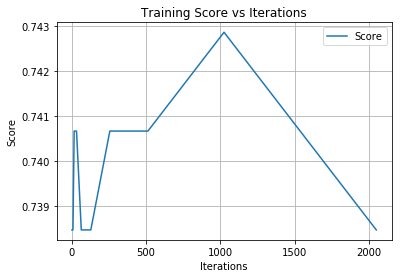

In [176]:
epochs = 2 ** np.arange(12)
df_SA = run_nn_SA(X_train_scaled, y_train, epochs=epochs)
plotIterationGraph(df_SA)

0.20649655600070754


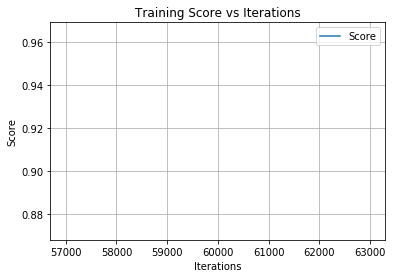

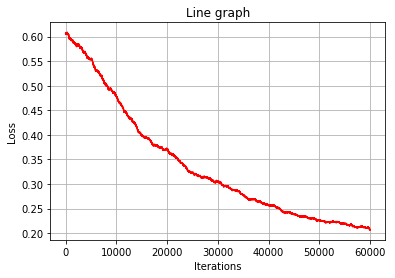

In [181]:
#epochs = 2 ** np.arange(12)
epochs = [4000]
df_SA, curve = run_nn_SA(X_train_scaled, y_train, epochs=epochs, 
                         decay =  mlrose.GeomDecay(init_temp=100000, decay=0.95), returnCurve = True)
plotIterationGraph(df_SA)
plotCurve(curve)

0.6054723953416188
0.6059898067994239
0.6062326068307344
0.6005344014424948
0.6001697241151543
0.5991877894819025
0.6002913102247913
0.6034630485576304
0.603389194199849
0.5710957101178867
0.4513189910732099
0.313263270549554
0.16108170021425225
0.08159176739703489
0.05920130604850973


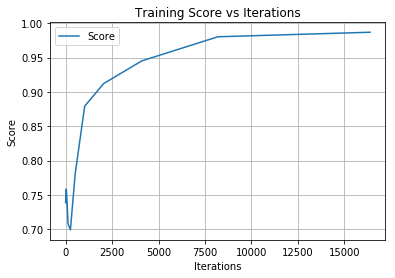

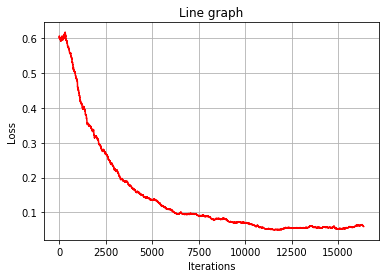

In [190]:
epochs = 2 ** np.arange(15)
#epochs = [10000]
df_SA, curve = run_nn_SA(X_train_scaled, y_train, epochs=epochs, 
                         decay =  mlrose.GeomDecay(init_temp=100000, decay=0.95), returnCurve = True)
plotIterationGraph(df_SA)
plotCurve(curve)

In [208]:
epochs = [12500]
df_SA, curve_0_95 = run_nn_SA(X_train_scaled, y_train, epochs=epochs, 
                         decay =  mlrose.GeomDecay(init_temp=100000, decay=0.95), returnCurve = True)
df_SA, curve_0_90 = run_nn_SA(X_train_scaled, y_train, epochs=epochs, 
                         decay =  mlrose.GeomDecay(init_temp=100000, decay=0.90), returnCurve = True)
df_SA, curve_0_99 = run_nn_SA(X_train_scaled, y_train, epochs=epochs, 
                         decay =  mlrose.GeomDecay(init_temp=100000, decay=0.99), returnCurve = True)

0.05567463695051524
0.060909486742120704
0.07712250531735067


0.42683849212369723
0.455272839625144
0.6552516394983786
0.41583194208579066
0.41583194208579066
0.41583194208579066


,Geom_0.9_Temp_100k,Geom_0.95_Temp_100k,Geom_0.99_Temp_100k,Exp_0.01_Temp_100,Exp_0.1_Temp_100,Exp_0.2_Temp_100
0,0.605472,0.605472,0.605472,0.605472,0.605472,0.605472
1,0.605990,0.605990,0.605990,0.605990,0.605990,0.605990
2,0.606091,0.606091,0.606091,0.606091,0.606091,0.606091
3,0.606233,0.606233,0.606233,0.606233,0.606233,0.606233
4,0.607277,0.607277,0.607277,0.607277,0.607277,0.607277
5,0.607095,0.607095,0.607095,0.607095,0.607095,0.607095
6,0.606286,0.606286,0.606286,0.606286,0.606286,0.606286
7,0.600534,0.600534,0.600534,0.600534,0.600534,0.600534
8,0.602387,0.602387,0.602387,0.602387,0.602387,0.602387
9,0.601273,0.601273,0.601273,0.601273,0.601273,0.601273


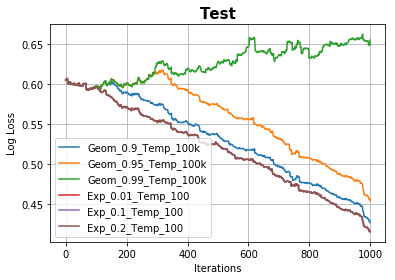

In [64]:
decays = {
    "Geom_0.9_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.90),
    "Geom_0.95_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.95),    
    "Geom_0.99_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.99),
    "Exp_0.01_Temp_100" : mlrose.ExpDecay(exp_const=.1, init_temp=100),
    "Exp_0.1_Temp_100" : mlrose.ExpDecay(exp_const=.1, init_temp=100),
    "Exp_0.2_Temp_100" : mlrose.ExpDecay(exp_const=.1, init_temp=100),                                                                  
}

test_decay_SA(X_train_scaled, y_train, [1000], decays)


0.05625229083834625
0.05276082558805338
0.06854448803914286
0.05762564131227717
0.05762564131227717
0.05762564131227717


,Geom_0.9_Temp_100k,Geom_0.95_Temp_100k,Geom_0.99_Temp_100k,Exp_0.01_Temp_100,Exp_0.1_Temp_100,Exp_0.2_Temp_100
0,0.605472,0.605472,0.605472,0.605472,0.605472,0.605472
1,0.605990,0.605990,0.605990,0.605990,0.605990,0.605990
2,0.606091,0.606091,0.606091,0.606091,0.606091,0.606091
3,0.606233,0.606233,0.606233,0.606233,0.606233,0.606233
4,0.607277,0.607277,0.607277,0.607277,0.607277,0.607277
5,0.607095,0.607095,0.607095,0.607095,0.607095,0.607095
6,0.606286,0.606286,0.606286,0.606286,0.606286,0.606286
7,0.600534,0.600534,0.600534,0.600534,0.600534,0.600534
8,0.602387,0.602387,0.602387,0.602387,0.602387,0.602387
9,0.601273,0.601273,0.601273,0.601273,0.601273,0.601273


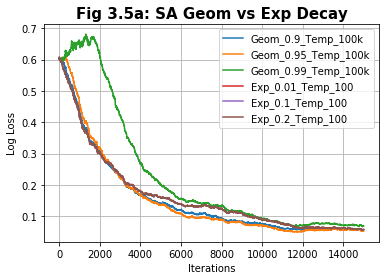

In [67]:
decays = {
    "Geom_0.9_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.90),
    "Geom_0.95_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.95),    
    "Geom_0.99_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.99),
    "Exp_0.01_Temp_100" : mlrose.ExpDecay(exp_const=.1, init_temp=100),
    "Exp_0.1_Temp_100" : mlrose.ExpDecay(exp_const=.1, init_temp=100),
    "Exp_0.2_Temp_100" : mlrose.ExpDecay(exp_const=.1, init_temp=100),                                                                  
}

test_decay_SA(X_train_scaled, y_train, [15000], decays, "Fig 3.5a: SA Geom vs Exp Decay")

0.14017308619286722
0.136106220486606
0.20142907273571975


,Geom_0.9_Temp_100k,Geom_0.95_Temp_100k,Geom_0.99_Temp_100k
0,0.605472,0.605472,0.605472
1,0.605990,0.605990,0.605990
2,0.606091,0.606091,0.606091
3,0.606233,0.606233,0.606233
4,0.607277,0.607277,0.607277
5,0.607095,0.607095,0.607095
6,0.606286,0.606286,0.606286
7,0.600534,0.600534,0.600534
8,0.602387,0.602387,0.602387
9,0.601273,0.601273,0.601273


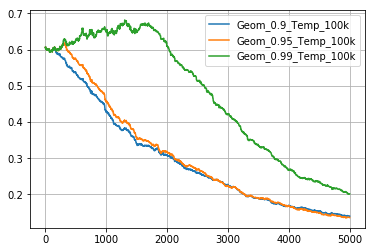

In [226]:
decays = {
    "Geom_0.9_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.90),
    "Geom_0.95_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.95),    
    "Geom_0.99_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.99)
}
test_decay_SA(X_train_scaled, y_train, [5000], decays)

In [50]:
decays = {
    "Geom_0.9_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.90),
    "Geom_0.95_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.95),    
    "Geom_0.99_Temp_100k" : mlrose.GeomDecay(init_temp=100000, decay=0.99)
}
test_decay_SA(X_train_scaled, y_train, [5000], decays)

0.14017308619286722
0.136106220486606
0.20142907273571975


TypeError: Empty 'DataFrame': no numeric data to plot

0.16792774279011466
0.16794025225032114
0.16608583451912584
0.17331206863677018


,Geom_0.95_Temp_100,Geom_0.95_Temp_1000,Geom_0.95_Temp_10000,Geom_0.95_Temp_100k
0,0.605472,0.605472,0.605472,0.605472
1,0.605990,0.605990,0.605990,0.605990
2,0.606091,0.606091,0.606091,0.606091
3,0.606233,0.606233,0.606233,0.606233
4,0.607277,0.607277,0.607277,0.607277
5,0.607095,0.607095,0.607095,0.607095
6,0.606286,0.606286,0.606286,0.606286
7,0.600534,0.600534,0.600534,0.600534
8,0.602387,0.602387,0.602387,0.602387
9,0.601273,0.601273,0.601273,0.601273


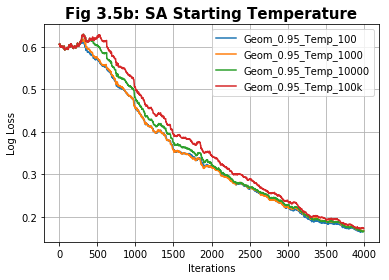

In [68]:
decays = {
        "Geom_0.95_Temp_100" : mlrose.GeomDecay(init_temp=10000, decay=0.95), 
        "Geom_0.95_Temp_1000" : mlrose.GeomDecay(init_temp=100000, decay=0.95),           
        "Geom_0.95_Temp_10000" : mlrose.GeomDecay(init_temp=10000000, decay=0.95),           
        "Geom_0.95_Temp_100k" : mlrose.GeomDecay(init_temp=1000000000, decay=0.95),           
}

test_decay_SA(X_train_scaled, y_train, [4000], decays, "Fig 3.5b: SA Starting Temperature")

In [69]:
df_SA, model_SA = run_nn_SA(X_train_scaled, y_train, epochs=np.arange(1000,15000,1000), 
                         decay =  mlrose.GeomDecay(init_temp=100000, decay=0.95), returnCurve = True, returnModel = True)

0.455272839625144
0.31735726781192036
0.2241516457344075
0.16794025225032114
0.136106220486606
0.10765828185780418
0.09397759151893384
0.08947259590212023
0.07999477020670652
0.070333480793584
0.056075866035451824
0.0529960162602195
0.05603718011448048
0.05695714174687521


In [259]:
df_SA

,Score,TrainTime
Epochs,,
1000,0.890110,1.061075
2000,0.901099,2.367211
3000,0.925275,3.280789
4000,0.942857,4.300607
5000,0.958242,5.877400
6000,0.967033,6.361502
7000,0.975824,7.713413
8000,0.975824,9.568887
9000,0.982418,10.060921


In [260]:
model_SA.fitness_curve

array([0.6054724 , 0.60598981, 0.60609093, ..., 0.05709125, 0.05705579,
       0.05695714])

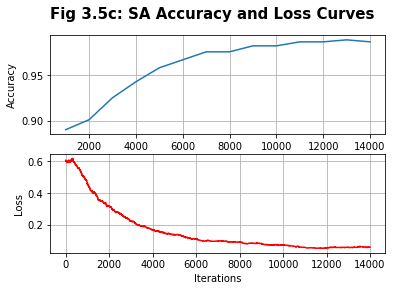

In [70]:
plotIterationGraph(df_SA, model_SA.fitness_curve, title = "Fig 3.5c: SA Accuracy and Loss Curves")

In [253]:
F1Score(model_SA, X_test_scaled, y_test)

The balanced accuracy of the Model is 0.964
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.95      0.98      0.96        41

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



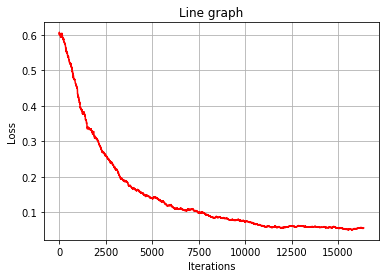

In [193]:
plotCurve(curve_0_90)

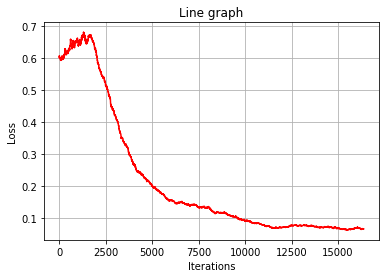

In [194]:
plotCurve(curve_0_99)

In [205]:
df_test = pd.DataFrame(index = pd.RangeIndex(stop = len(curve_0_99)) )

In [207]:
df_test["0.99"] = curve_0_99
df_test

,0.99
0,0.605472
1,0.605990
2,0.606091
3,0.606233
4,0.607277
5,0.607095
6,0.606286
7,0.600534
8,0.602387
9,0.601273


# GA

In [80]:
def test_pop_GA(X_train, y_train, epochs, pop_sizes, mutation_prob, title = "Population Size"):
    df_loss = pd.DataFrame(index = pd.RangeIndex(stop = epochs[-1]))
    for size in pop_sizes:
        df, curve  = run_nn_GA(X_train, y_train, epochs, size, mutation_prob, True)
        df_loss[size] = curve
    
    df_loss.plot()
    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})  
    plt.xlabel("Iterations")  
    plt.ylabel("Log Loss")  
    plt.grid()
    return df_loss

In [81]:
def test_mutation_GA(X_train, y_train, epochs, pop_size, mutation_probs, title = "Mutation Probability"):
    df_loss = pd.DataFrame(index = pd.RangeIndex(stop = epochs[-1]))
    for mutation_prob in mutation_probs:
        df, curve  = run_nn_GA(X_train, y_train, epochs, pop_size, mutation_prob, True)
        df_loss[mutation_prob] = curve
    
    df_loss.plot()
    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})  
    plt.xlabel("Iterations")  
    plt.ylabel("Log Loss")  

    plt.grid()

    return df_loss

In [73]:
def run_nn_GA(X_train, y_train, epochs,pop_size = 200, mutation_prob=0.1 ,returnCurve = False, returnModel = False):
    
    results = []

    for epoch in epochs:
        
        if str(type(epoch)) == str(np.int64):
            epoch = int(epoch)
    
        
        neural_net = mlrose.NeuralNetwork(
                hidden_nodes=[5,5],
                activation='tanh',
                algorithm='genetic_alg',
                max_iters=epoch,
                bias=True,
                is_classifier=True,
                learning_rate=0.005,
                early_stopping=True,
                clip_max=1,
                max_attempts=100,
                random_state=1,
                curve = True,
                pop_size=pop_size,
                mutation_prob=mutation_prob
        )
        
        start = time.time()
        neural_net.fit(X_train, y_train)
        print(neural_net.loss)
        end = time.time()
        
        timing = end - start
        score = neural_net.score(X_train, y_train)
        
        result = [epoch, score, timing]
        results.append(result)
    df = pd.DataFrame(results, columns = ["Epochs", 'Score', "TrainTime"])
    df = df.set_index("Epochs")
    
    if returnCurve:
        return df, neural_net.fitness_curve
    if returnModel:
        return df, neural_net
    
    return df

0.3421569398208952
0.327550568926231
0.327550568926231
0.24728472398120205
0.21813808916719504
0.1719896051830442
0.13504747181108004
0.10046134462792503
0.077306243161044
0.07206401461130242


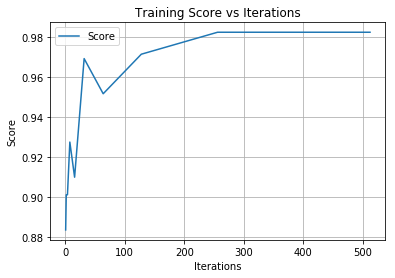

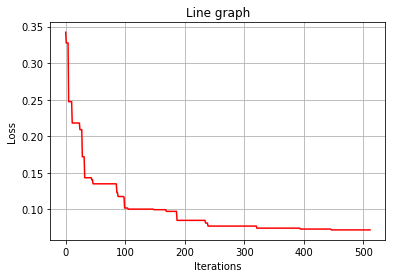

In [264]:
epochs = 2 ** np.arange(10)

df_GA, curve = run_nn_GA(X_train_scaled, y_train, epochs=epochs, 
                          returnCurve = True)
plotIterationGraph(df_GA)
plotCurve(curve)

In [265]:
df_GA

,Score,TrainTime
Epochs,,
1,0.883516,0.267633
2,0.901099,0.347473
4,0.901099,0.575609
8,0.927473,1.033086
16,0.909890,1.952000
32,0.969231,3.769485
64,0.951648,7.558235
128,0.971429,15.145491
256,0.982418,32.692776


In [11]:
model_GA = run_nn_GA(X_train_scaled, y_train, epochs=[300], 
                          returnModel = True)

0.077306243161044


In [14]:
F1Score(model_GA, X_train_scaled, y_train)

The balanced accuracy of the Model is 0.977
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       283
           1       0.98      0.97      0.98       172

   micro avg       0.98      0.98      0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [13]:
F1Score(model_GA, X_test_scaled, y_test)

The balanced accuracy of the Model is 0.951
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        74
           1       0.93      0.97      0.95        40

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



0.07015615319261233
0.05608165755695899
0.06135124588845257
0.05696614410790369
0.06134458776022742


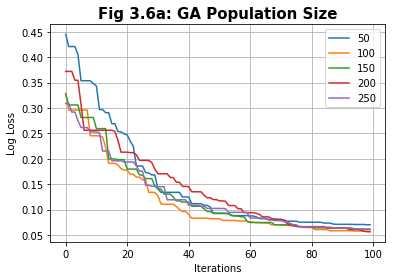

In [82]:


df_test = test_pop_GA(X_train_scaled, y_train, [100], 
                       [50, 100, 150 , 200, 250], mutation_prob = 0.01, title = "Fig 3.6a: GA Population Size")

0.0923576612614953
0.08203585524474645
0.09304307952679051
0.11971585455352599
0.10234409796153915


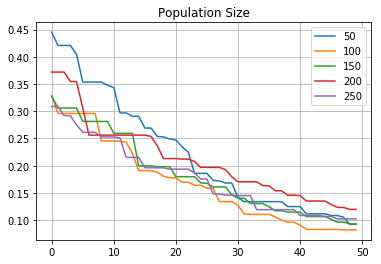

In [39]:
df_test = test_pop_GA(X_train_scaled, y_train, [50], 
                       [50, 100, 150 , 200, 250], mutation_prob = 0.01)

0.07443622637560598
0.08038016952502511
0.15665888138217607
0.18045263681719462
0.17293690054387037


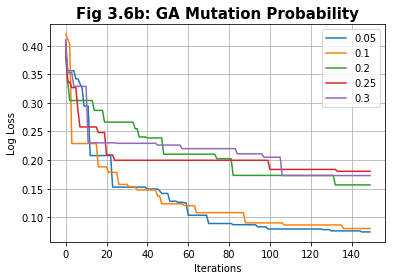

In [83]:
df_test = test_mutation_GA(X_train_scaled, y_train, [150], 
                       150, mutation_probs = [0.05, 0.1, .2 , .25, .3], title = "Fig 3.6b: GA Mutation Probability")

In [84]:
df_final_GA, model_GA = run_nn_GA(X_train_scaled, y_train, epochs=np.arange(1,350,25), pop_size = 150, mutation_prob = 0.1, 
                          returnModel = True)

0.42001054889715983
0.17855045858822113
0.1235977029893333
0.1081363167057917
0.0902770640212027
0.08656100131545179
0.08038016952502511
0.08038016952502511
0.08038016952502511
0.07951413048721503
0.0750416931257805
0.0750416931257805
0.0750416931257805
0.0750416931257805


In [266]:
df_final_GA

,Score,TrainTime
Epochs,,
1,0.813187,0.204341
26,0.956044,2.775937
51,0.964835,5.999606
76,0.964835,8.161146
101,0.964835,10.270308
126,0.978022,11.580411
151,0.975824,14.122183
176,0.975824,16.697893
201,0.975824,20.417308


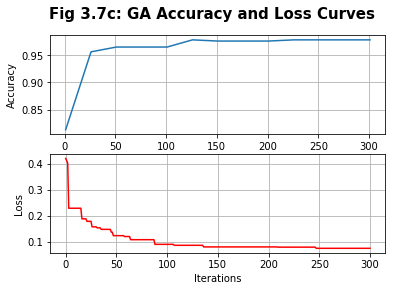

In [85]:
plotIterationGraph(df_final_GA[:13], model_GA.fitness_curve[:301], title = "Fig 3.7c: GA Accuracy and Loss Curves")

In [74]:
F1Score(model_GA, X_train_scaled, y_train)

The balanced accuracy of the Model is 0.970
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       289
           1       0.96      0.98      0.97       166

   micro avg       0.98      0.98      0.98       455
   macro avg       0.97      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [75]:
F1Score(model_GA, X_test_scaled, y_test)

The balanced accuracy of the Model is 0.953
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.98      0.93      0.95        44

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



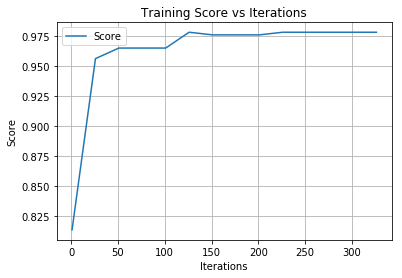

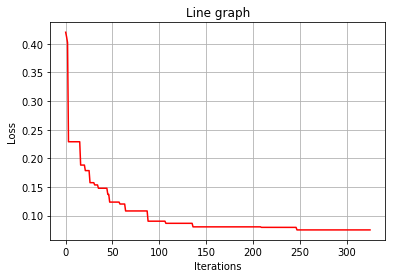

In [76]:
plotIterationGraph(df_final_GA)
plotCurve(model_GA.fitness_curve)

In [56]:
model_GA.fitness_curve

[]